<a href="https://colab.research.google.com/github/aliciawill/BigData/blob/master/knn_%EC%8B%9C%EA%B0%81%ED%99%94%2B%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import parallel_coordinates

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

In [2]:
from sklearn.datasets import load_iris
# sklearn에 내장되어있는 iris 데이터를 사용

iris = load_iris()

print(iris.DESCR)
# iris dataset 정보를 알 수 있다

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# feature와 target를 하나의 DataFrame으로 만들고 각각의 column명을 붙여주었다.
df = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.Series(iris.target, dtype="category")
y = y.cat.rename_categories(iris.target_names)
df['species'] = y

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

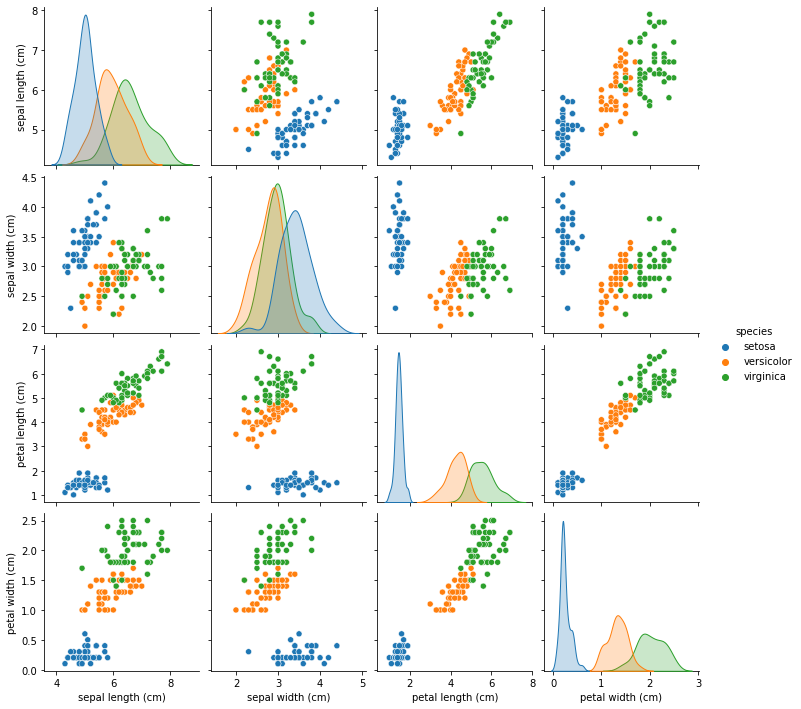

In [7]:
sns.pairplot(df, hue="species")
plt.show()

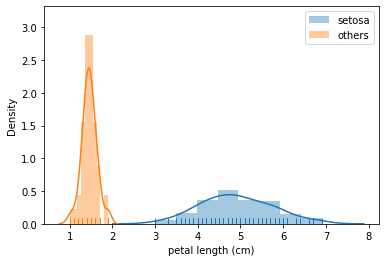

In [8]:
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="others")
plt.legend()
plt.show()

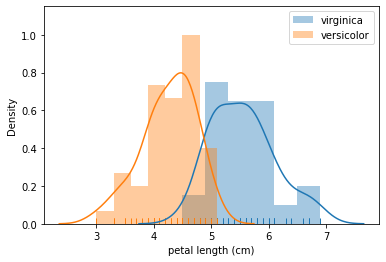

In [9]:
sns.distplot(df[df.species == "virginica"]["petal length (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"], hist=True, rug=True, label="versicolor")
plt.legend()
plt.show()

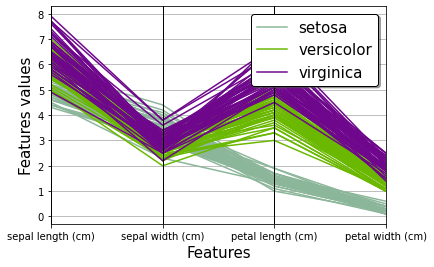

In [10]:
parallel_coordinates(df, "species")
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

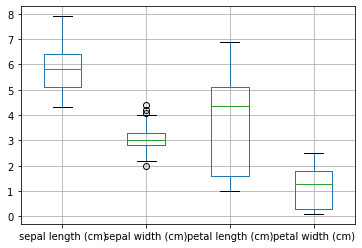

In [11]:
df.boxplot()
plt.show()

In [12]:
# train과 test data를 0.75 : 0.25 비율로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], random_state=3)

In [13]:
# Standard Scaler
ss = StandardScaler() # Scaling
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_test_s = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)
X_train_s.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.701282,-0.855303,0.852152,0.903021
1,0.444603,-2.029248,0.390247,0.368604
2,0.701282,-0.620514,1.025366,1.170229
3,-0.068753,-0.855303,0.043819,-0.032208
4,-1.608823,1.257798,-1.630584,-1.368249


In [20]:
# Minmax Scaler
ms = MinMaxScaler()
X_train_m = pd.DataFrame(ms.fit_transform(X_train), columns = X_train.columns)
X_test_m = pd.DataFrame(ms.transform(X_test), columns = X_test.columns)
X_train_m.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.583333,0.318182,0.754386,0.750000
1,0.527778,0.090909,0.614035,0.583333
2,0.583333,0.363636,0.807018,0.833333
3,0.416667,0.318182,0.508772,0.458333
4,0.083333,0.727273,0.000000,0.041667


In [14]:
def print_metrics(model, X_train):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print('*** Cross val score *** \n   {}'.format(scores))
    print('\n*** Mean Accuracy *** \n   {:.7f}'.format(scores.mean()))
    # print('\n*** Confusion Matrix *** \n', confusion_matrix(y_train, model.predict(X_train)))

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print_metrics(knn, X_train)

*** Cross val score *** 
   [0.91666667 1.         0.90909091 1.         1.         1.
 1.         1.         1.         0.90909091]

*** Mean Accuracy *** 
   0.9734848


In [21]:
knn_s = KNeighborsClassifier()
knn_s.fit(X_train_s, y_train)
print_metrics(knn_s, X_train_s)

*** Cross val score *** 
   [0.83333333 1.         0.90909091 1.         0.90909091 1.
 1.         0.90909091 0.81818182 0.90909091]

*** Mean Accuracy *** 
   0.9287879


In [22]:
knn_m = KNeighborsClassifier()
knn_m.fit(X_train_m, y_train)
print_metrics(knn_m, X_train_m)

*** Cross val score *** 
   [0.83333333 1.         0.90909091 1.         0.90909091 1.
 1.         1.         0.90909091 0.90909091]

*** Mean Accuracy *** 
   0.9469697


In [23]:
grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

In [24]:
gs = GridSearchCV(knn, grid_params, cv=10)
gs.fit(X_train, y_train)
print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score :  0.9734848484848484
Best Test Score :  0.9473684210526315


In [25]:
gs_s = GridSearchCV(knn_s, grid_params, cv=10)
gs_s.fit(X_train_s, y_train)
print("Best Parameters : ", gs_s.best_params_)
print("Best Score : ", gs_s.best_score_)
print("Best Test Score : ", gs_s.score(X_test_s, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'distance'}
Best Score :  0.9727272727272727
Best Test Score :  0.9473684210526315


In [26]:
gs_m = GridSearchCV(knn_m, grid_params, cv=10)
gs_m.fit(X_train_m, y_train)
print("Best Parameters : ", gs_m.best_params_)
print("Best Score : ", gs_m.best_score_)
print("Best Test Score : ", gs_m.score(X_test_m, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best Score :  0.9734848484848484
Best Test Score :  0.9473684210526315


In [27]:
knn_m = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 9, weights = 'uniform')
knn_m.fit(X_train_m, y_train)
print_metrics(knn_m, X_train_m)

*** Cross val score *** 
   [0.91666667 1.         1.         1.         0.90909091 1.
 1.         1.         1.         0.90909091]

*** Mean Accuracy *** 
   0.9734848


In [28]:
def print_test_metrics(model, X_test):
    print('*** Test Accuracy *** \n   {}'.format(model.score(X_test, y_test)))
    print('\n*** Confusion Matrix *** \n', confusion_matrix(y_test, model.predict(X_test)))

In [29]:
print_test_metrics(knn_m, X_test_m)

*** Test Accuracy *** 
   0.9473684210526315

*** Confusion Matrix *** 
 [[15  0  0]
 [ 0 11  1]
 [ 0  1 10]]


In [ ]:
# 하나의 test instance를 제외하고 모두 분류해냈다.